# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG     H   MIT     GAME
0   0   7   3   6   5933  1068  6199   DEFEAT
    1   7   0  10   3601   747     0   DEFEAT
    2   9   1   6   4352     0     0   DEFEAT
    3   7   7   2   2332  6325     0   DEFEAT
    4   6   4   2   3410  5979   606   DEFEAT
...    ..  ..  ..    ...   ...   ...      ...
544 5  15   4   8  10316  1927  4443  VICTORY
    6  24   0  11   9603     0  2011  VICTORY
    7  16   7   8   7621  1233     0  VICTORY
    8   5  13   8   1981  8344   481  VICTORY
    9   6  14   5   2545  7359  1134  VICTORY

[5450 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5450 entries, (0, 0) to (544, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       5450 non-null   int64 
 1   A       5450 non-null   int64 
 2   D       5450 non-null   int64 
 3   DMG     5450 non-null   int64 
 4   H       5450 non-null   int64 
 5   MIT     5450 non-null   int64 
 6   GAME    5450 non-null   object
dtypes: int64(6), object(1)
memory usage: 334.8+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,5450.000000,5450.000000,5450.000000,5450.000000,5450.000000,5450.000000
mean,13.844404,7.283486,6.440917,6217.599817,3836.078716,2401.607890
std,9.512604,8.137006,3.830399,4271.192403,5027.772770,4637.524972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2793.000000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,5543.000000,764.500000,374.000000
75%,20.000000,12.000000,9.000000,9093.000000,7436.000000,2059.750000
max,58.000000,54.000000,21.000000,26666.000000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D    DMG     H   MIT     GAME
0   0   7   3   6   5933  1068  6199   DEFEAT
    1   7   0  10   3601   747     0   DEFEAT
    2   9   1   6   4352     0     0   DEFEAT
    3   7   7   2   2332  6325     0   DEFEAT
    4   6   4   2   3410  5979   606   DEFEAT
...    ..  ..  ..    ...   ...   ...      ...
544 5  15   4   8  10316  1927  4443  VICTORY
    6  24   0  11   9603     0  2011  VICTORY
    7  16   7   8   7621  1233     0  VICTORY
    8   5  13   8   1981  8344   481  VICTORY
    9   6  14   5   2545  7359  1134  VICTORY

[5450 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000
mean,17.805505,4.268807,6.150459,9101.966055,384.354128,9705.466055
std,10.102994,3.722495,3.685193,4102.309749,1116.243517,6071.901692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,4.000000,6063.750000,0.000000,5391.500000
50%,17.000000,3.000000,6.000000,8894.000000,0.000000,8550.000000
75%,24.000000,6.000000,8.000000,11684.500000,67.750000,12912.250000
max,58.000000,24.000000,21.000000,24682.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,17.102752,1.925688,7.152294,8180.978899,340.237156,633.207339
std,9.143519,2.599640,4.067999,3626.657270,544.102937,1112.429643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5550.250000,0.000000,0.000000
50%,16.000000,1.000000,7.000000,7831.500000,3.500000,84.500000
75%,23.000000,3.000000,10.000000,10470.500000,515.500000,807.000000
max,52.000000,18.000000,21.000000,26666.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,8.605505,14.148624,5.874771,2812.037615,9057.782569,518.079358
std,6.763246,8.454121,3.533412,2106.067283,4102.405500,868.888981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,1281.000000,6098.500000,0.000000
50%,8.000000,13.000000,6.000000,2512.000000,8632.500000,213.000000
75%,13.000000,19.000000,8.000000,3838.000000,11545.250000,636.250000
max,52.000000,54.000000,21.000000,16254.000000,27756.000000,7778.000000


그림 저장:tank_hist


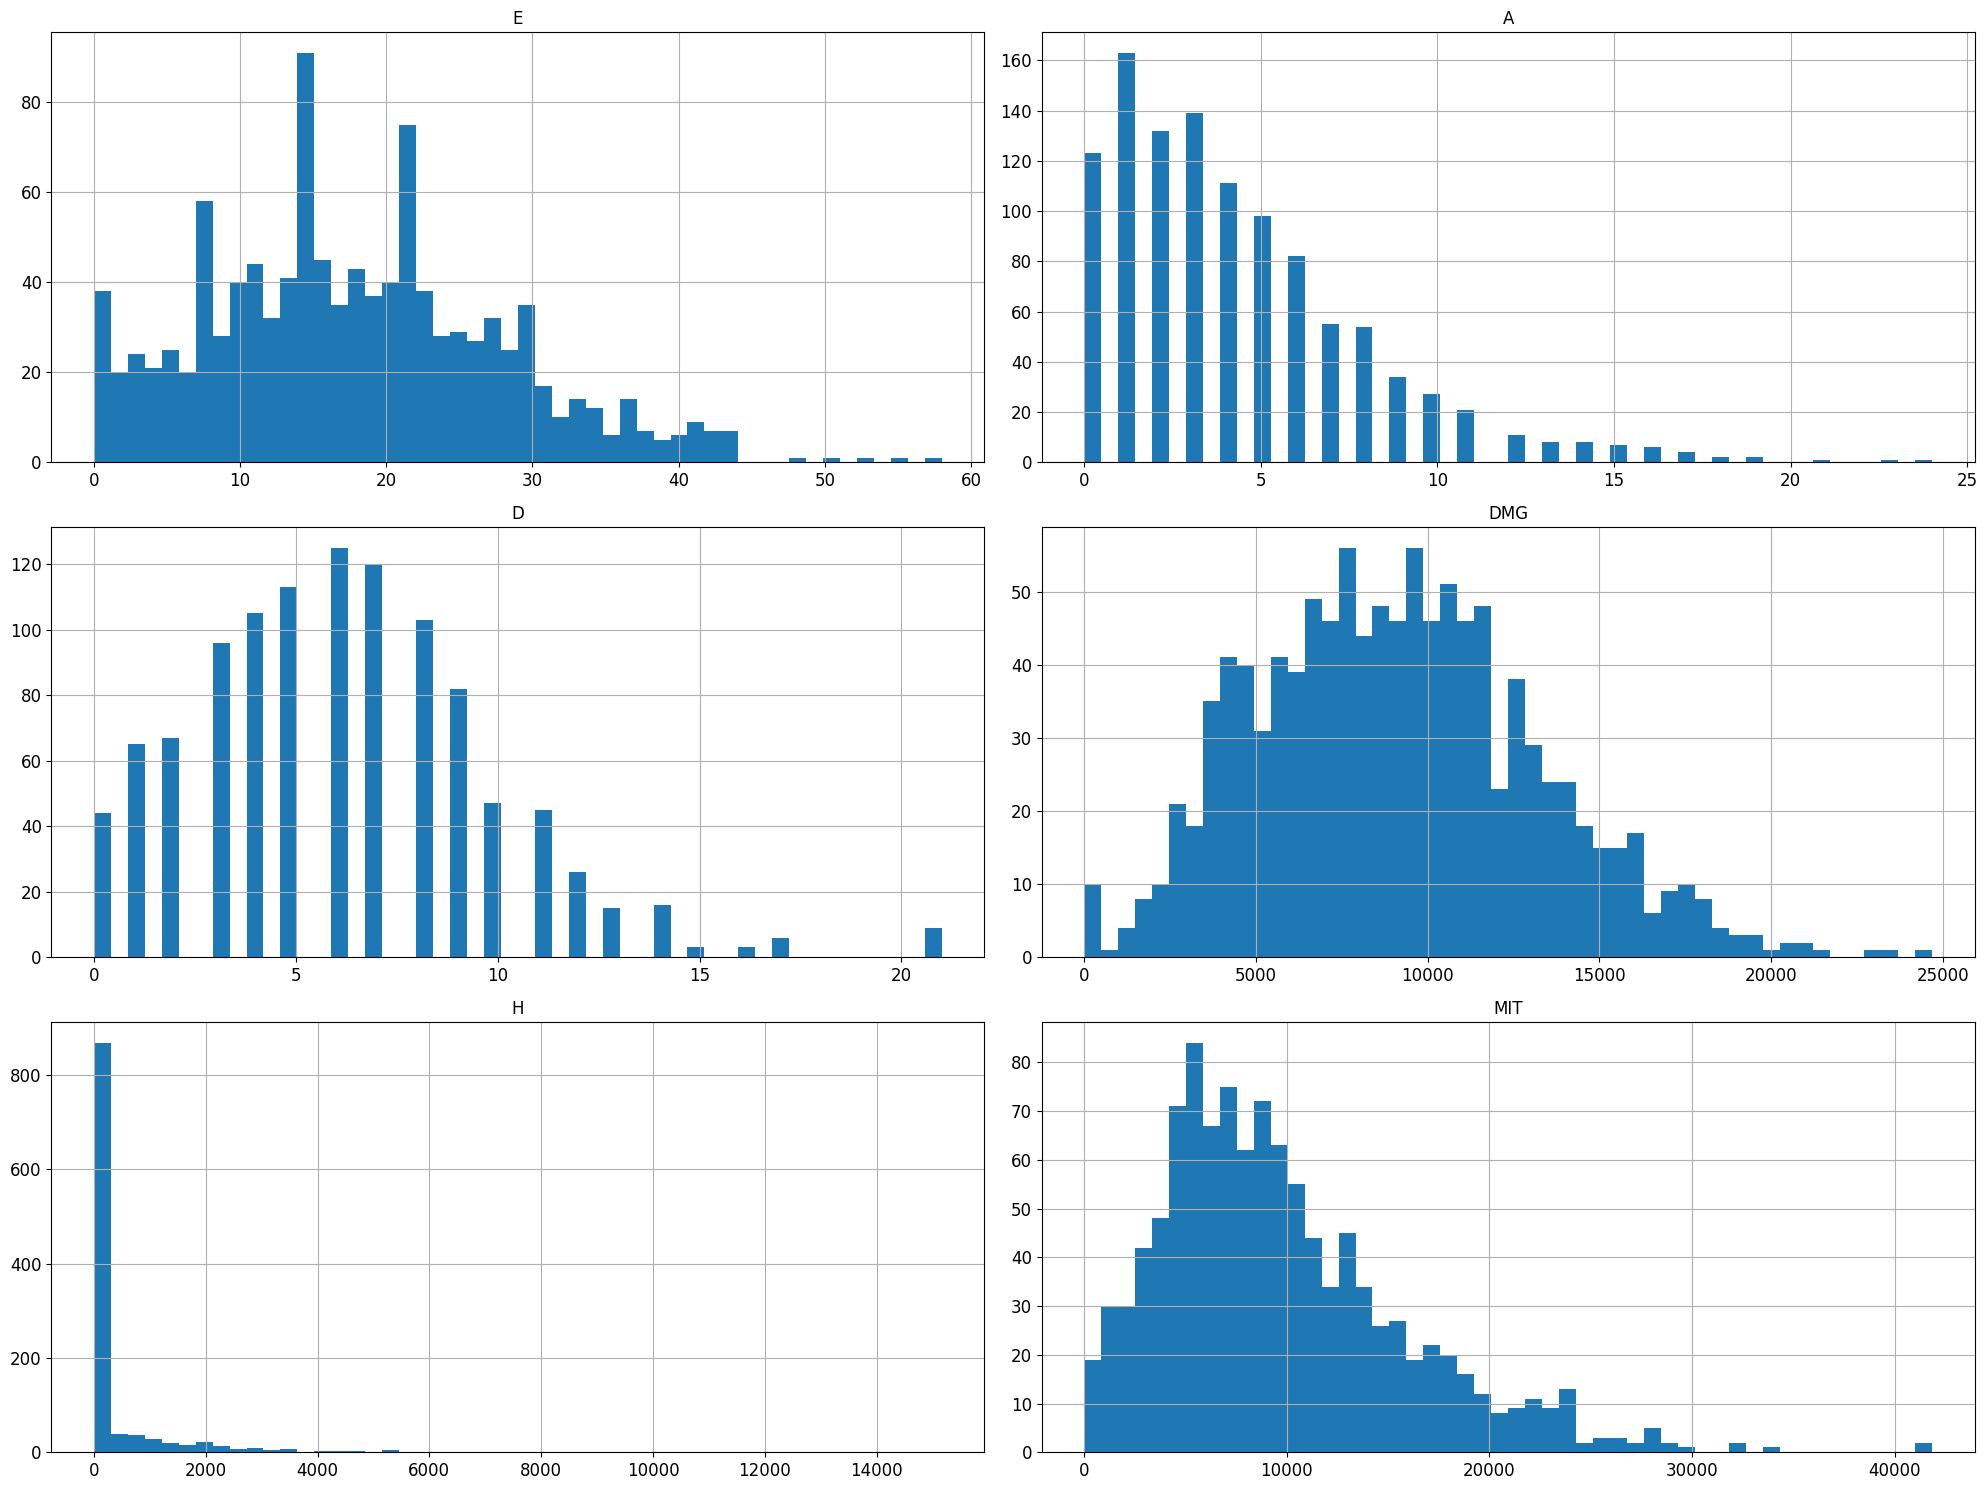

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


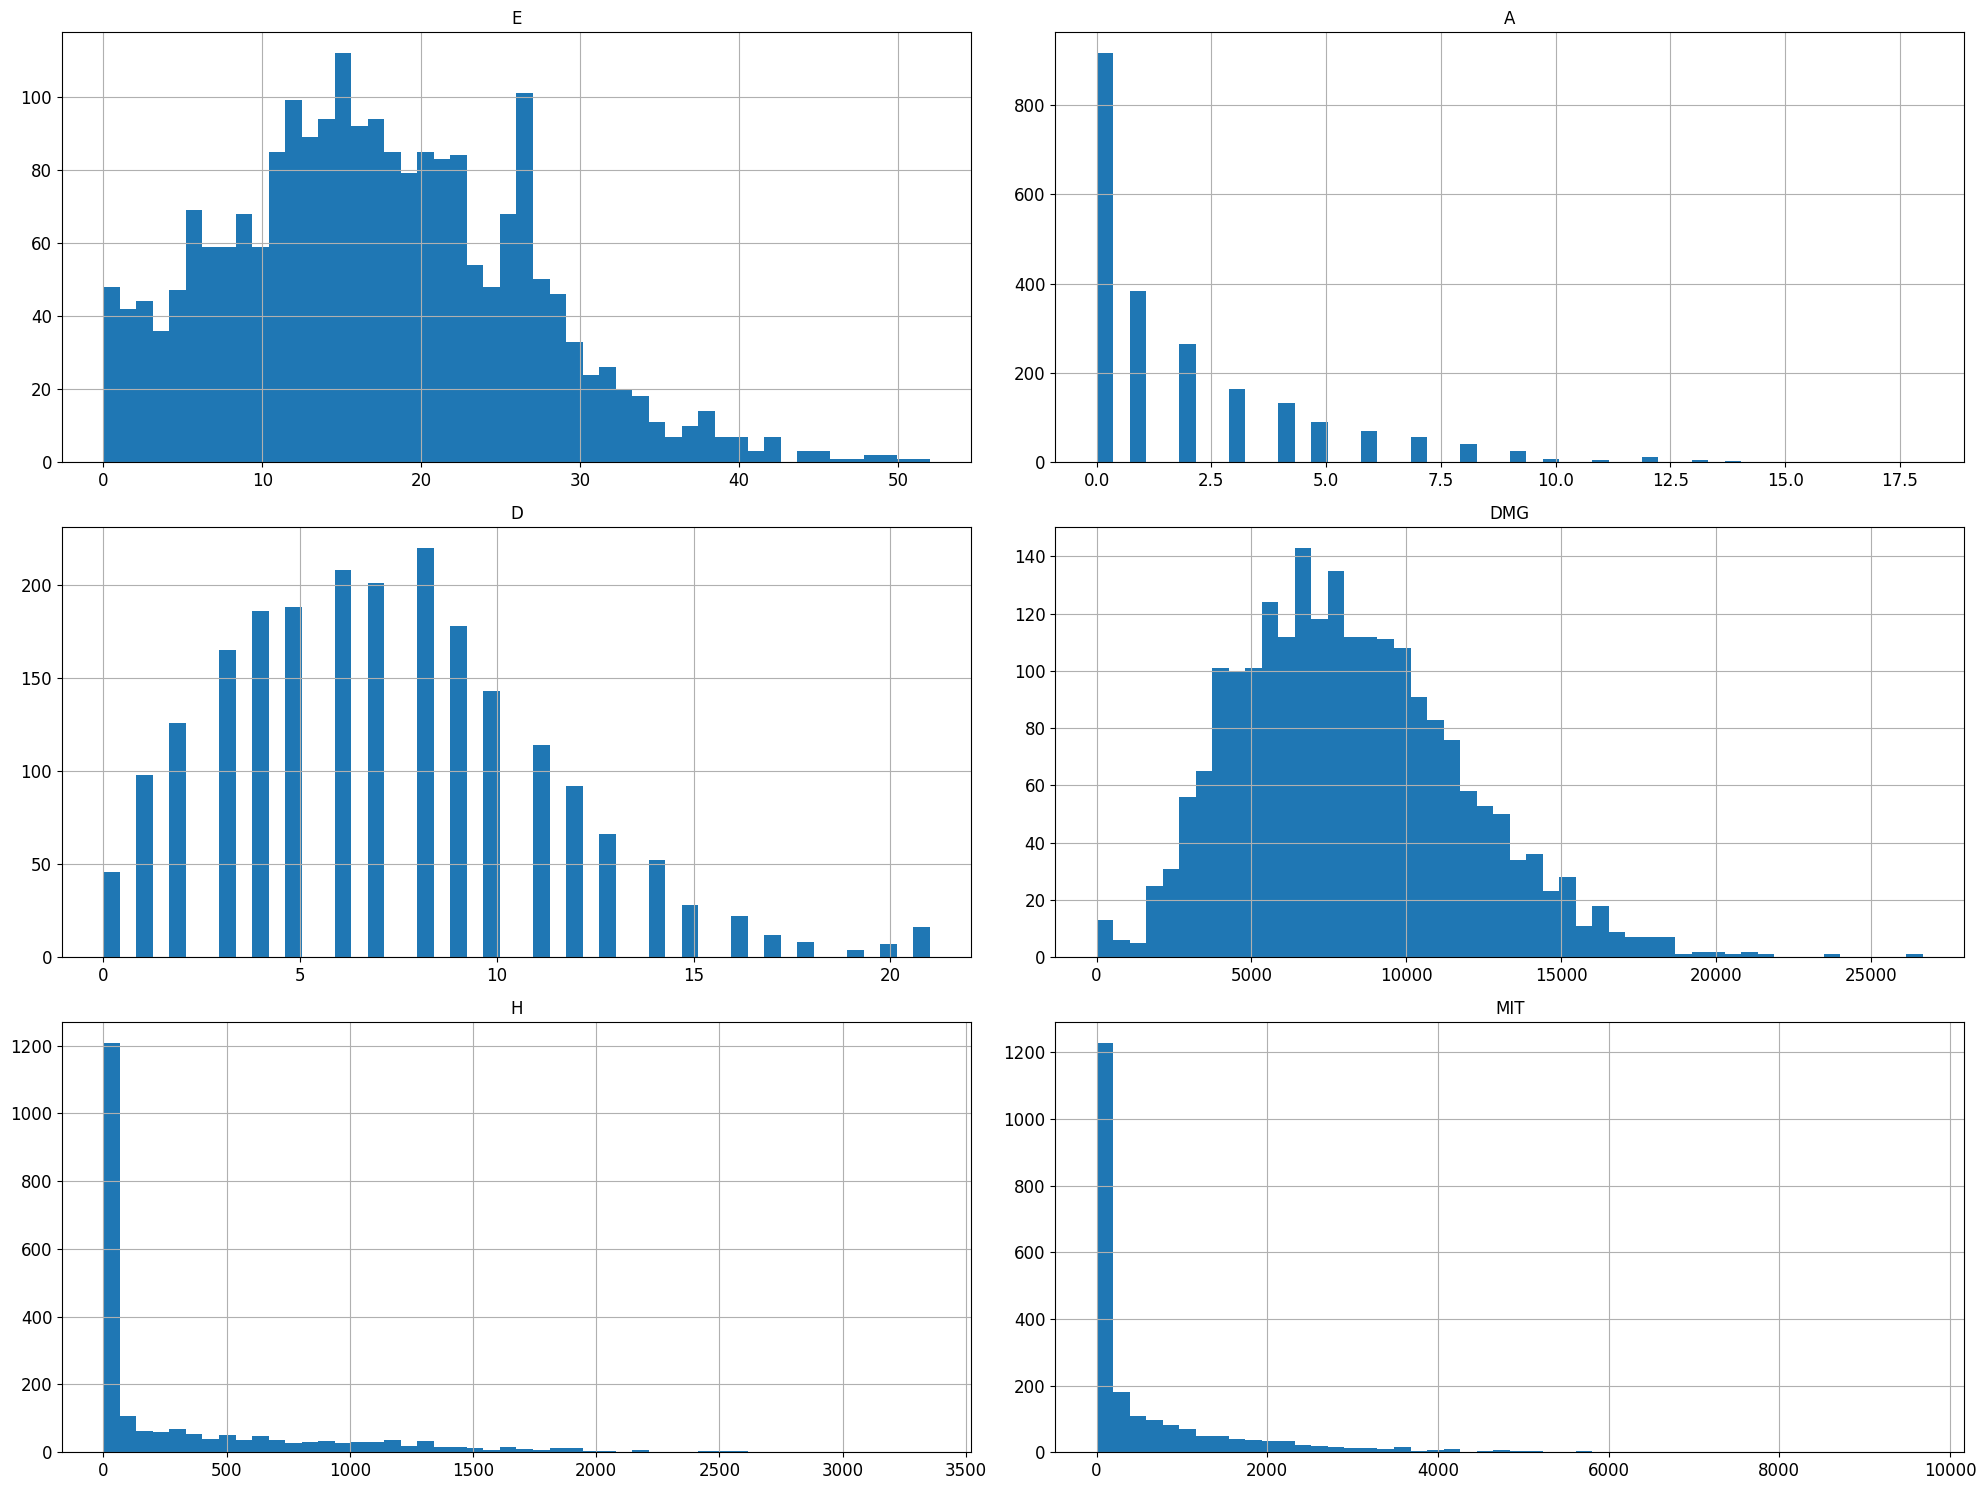

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


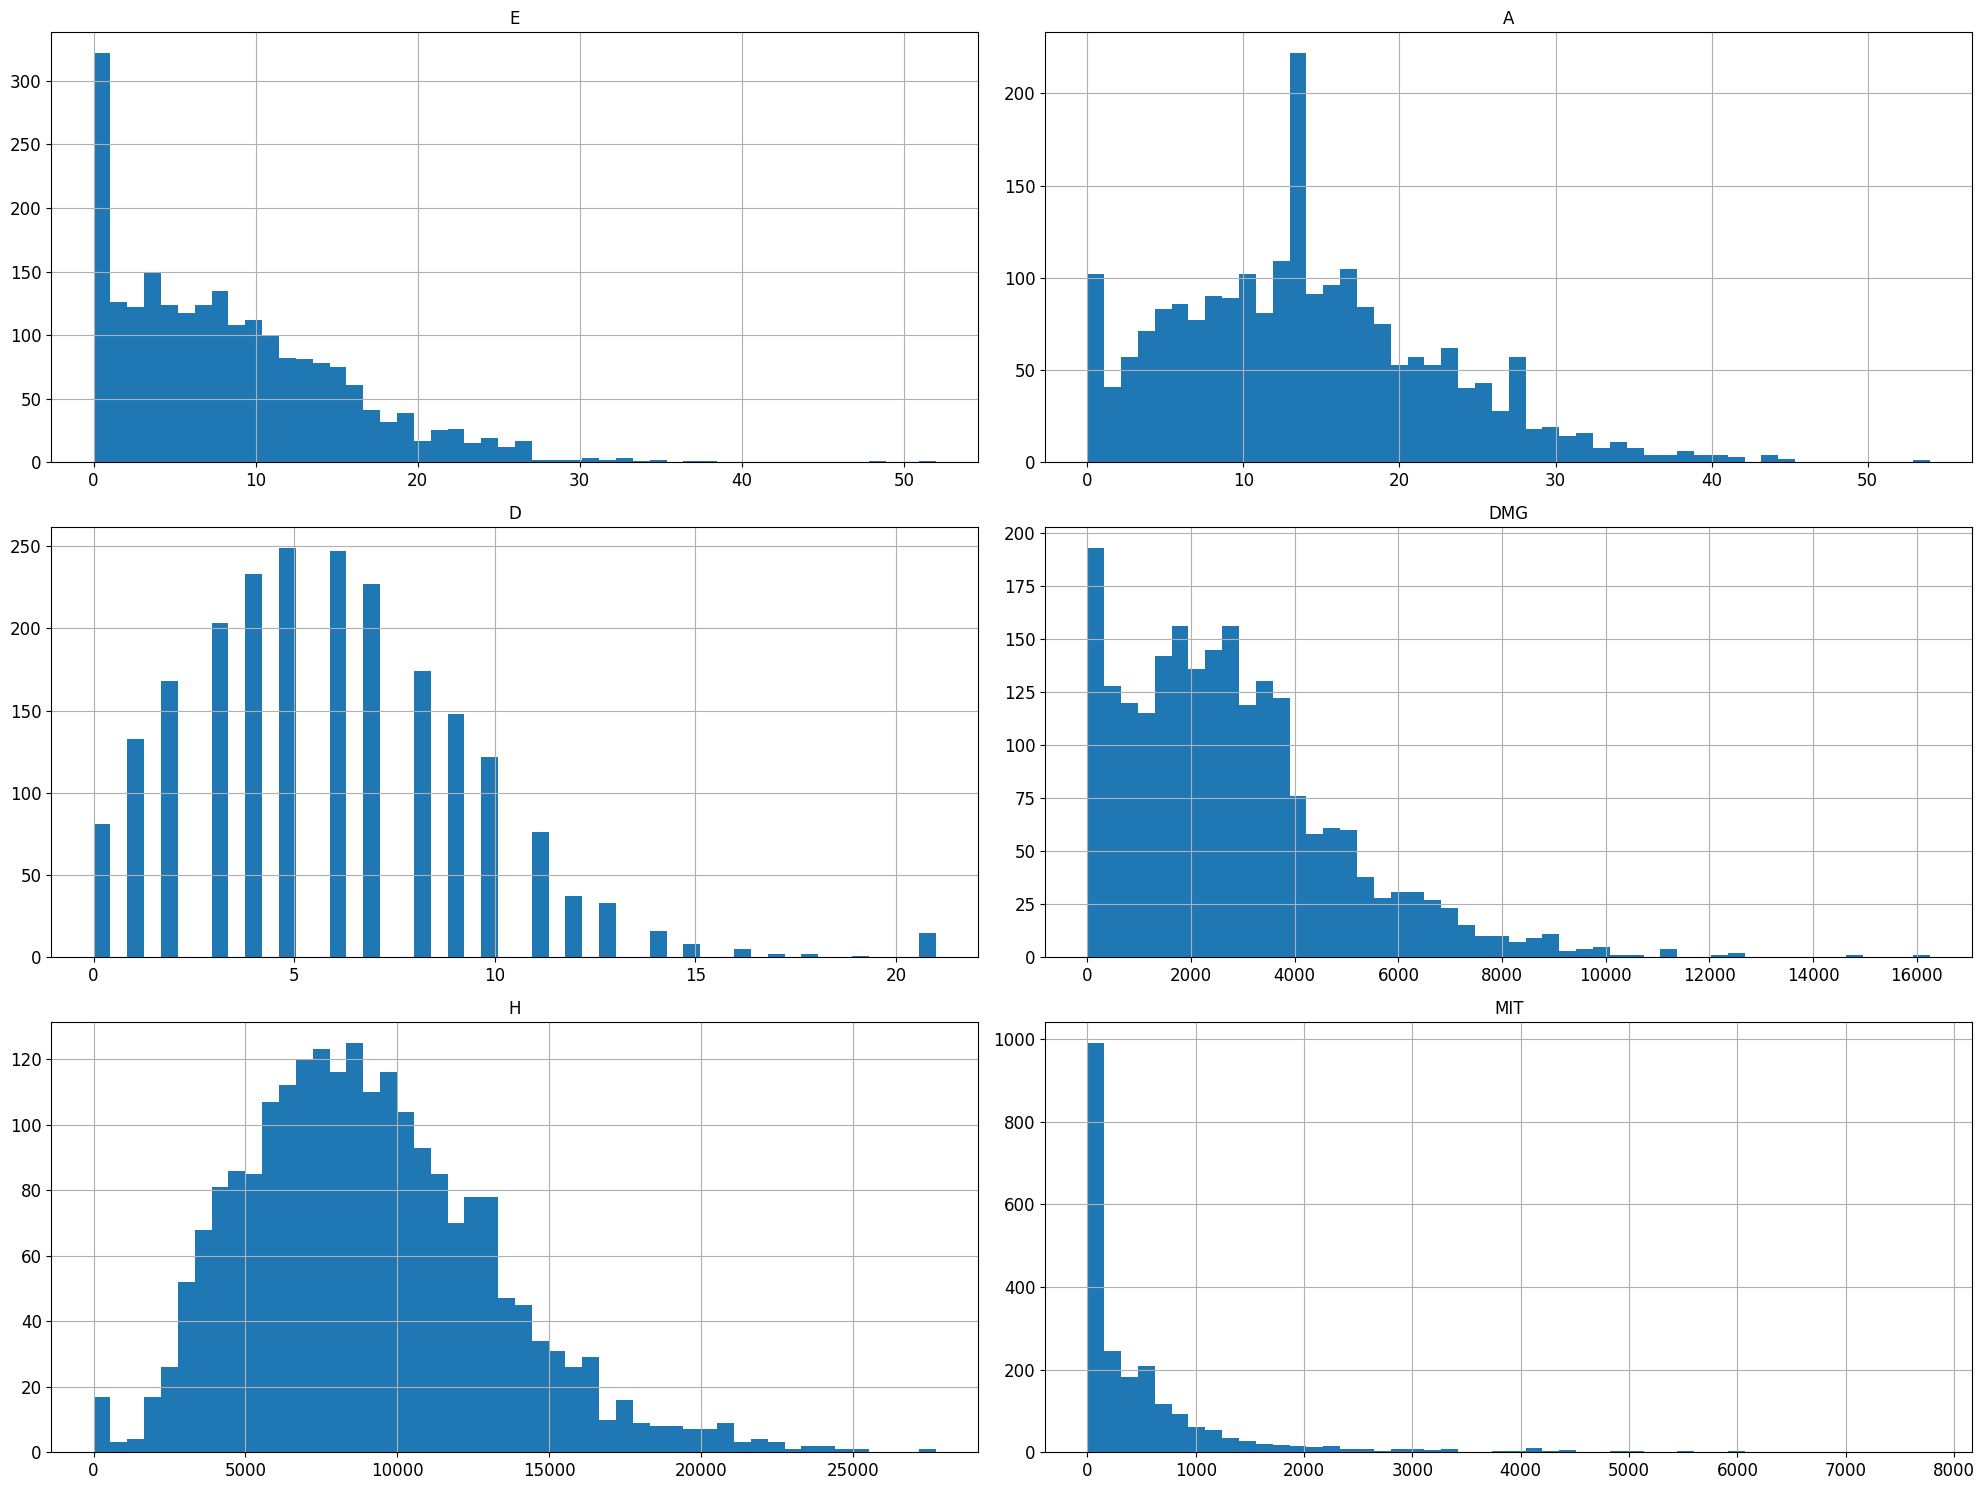

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D   DMG      H    MIT     GAME
341 0  12   1   1  5839      0  12685  VICTORY
    1  23   0   0  4362      0      0  VICTORY
    2  25   0   2  7750      0      0  VICTORY
    3  16   9   0  3108   7274   1049  VICTORY
    4   1  20   1   200   5063      0  VICTORY
...    ..  ..  ..   ...    ...    ...      ...
350 5  11   4  11  6977    645   6378   DEFEAT
    6  10   0  13  7389      0    592   DEFEAT
    7  15   0  13  9338   1985    556   DEFEAT
    8   8  14   8  2859  10260    291   DEFEAT
    9   1  14  10   158  12357      0   DEFEAT

[5450 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
341 0  0.206897  0.018519  0.047619  0.218968  0.000000  0.303114
    1  0.396552  0.000000  0.000000  0.163579  0.000000  0.000000
    2  0.431034  0.000000  0.095238  0.290632  0.000000  0.000000
    3  0.275862  0.166667  0.000000  0.116553  0.262069  0.025066
    4  0.017241  0.370370  0.047619  0.007500  0.182411  0.000000
...         ...       ...       ...       ...       ...       ...
350 5  0.189655  0.074074  0.523810  0.261644  0.023238  0.152405
    6  0.172414  0.000000  0.619048  0.277094  0.000000  0.014146
    7  0.258621  0.000000  0.619048  0.350184  0.071516  0.013286
    8  0.137931  0.259259  0.380952  0.107215  0.369650  0.006954
    9  0.017241  0.259259  0.476190  0.005925  0.445201  0.000000

[5450 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(545, 60)
(545,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.87155963, 0.89908257, 0.90825688, 0.85321101, 0.86238532])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.66055046, 0.74311927, 0.62385321, 0.70642202, 0.63302752])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.89908257, 0.83486239, 0.88073394, 0.88990826, 0.86238532])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(NuSVC(), 0.8862385321100918),
 (RandomForestClassifier(n_jobs=-1), 0.8844036697247708),
 (LogisticRegression(n_jobs=-1), 0.8825688073394495),
 (SVC(), 0.8807339449541285),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.8788990825688072),
 (RidgeClassifier(), 0.8752293577981651),
 (LinearSVC(dual='auto'), 0.8752293577981651),
 (RidgeClassifierCV(), 0.8733944954128441),
 (SGDClassifier(n_jobs=-1), 0.8733944954128441),
 (NearestCentroid(), 0.873394495412844),
 (ExtraTreesClassifier(n_jobs=-1), 0.8697247706422019),
 (HistGradientBoostingClassifier(), 0.8605504587155964),
 (KNeighborsClassifier(n_jobs=-1), 0.8550458715596332),
 (GradientBoostingClassifier(), 0.8532110091743121),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8495412844036698),
 (MLPClassifier(max_iter=3200), 0.8495412844036698),
 (BaggingClassifier(n_jobs=-1), 0.8440366972477065),
 (AdaBoostClassifier(), 0.8330275229357799),
 (Perceptron(n_jobs=-1), 0.8201834862385322),
 (DecisionTreeClassifier(), 0.7706422018348624),
 

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [38]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum() / 2, importances_support.sum() / 2),
                    ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damage / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_support / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.31
죽음: 0.29
도움: 0.18
피해: 0.10
경감: 0.07
치유: 0.06

**1인 역할 중요도**
돌격: 0.30
지원: 0.18
공격: 0.17

**1인 돌격 특성 중요도**
죽음: 0.13
처치: 0.09
도움: 0.03
피해: 0.03
경감: 0.02
치유: 0.01

**1인 공격 특성 중요도**
처치: 0.08
죽음: 0.04
피해: 0.02
도움: 0.01
경감: 0.01
치유: 0.01

**1인 지원 특성 중요도**
도움: 0.06
죽음: 0.04
처치: 0.03
치유: 0.02
피해: 0.02
경감: 0.02


In [28]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (248)
       E   A   D    DMG      H    MIT     GAME
2470  17   5  16  11411      0  18074   DEFEAT
2471  16   9  13  13184      0   2441   DEFEAT
2472  19   5  16   9885      0     75   DEFEAT
2473  12  11   3   3582  13096    600   DEFEAT
2474  17  10   9   6901  14417    249   DEFEAT
2475  40   5   7  14588      0  17476  VICTORY
2476  37  12   5  12516   1044   8359  VICTORY
2477  24   1  12  10582      0    314  VICTORY
2478  18  30   9   6781  15929    223  VICTORY
2479  19  34   5   2530  14801   1535  VICTORY
TEAM 1: 0.63 0.81 0.73 0.85 0.75
TEAM 2: 1.37 1.52 0.94 1.13 1.27

DEFEAT (247)
       E   A   D    DMG      H    MIT     GAME
2460  15   1  14  10630    323  12062   DEFEAT
2461  20   0  12   8799    225   1133   DEFEAT
2462  13   2  14   9624     78      0   DEFEAT
2463   4   8   7   1732   8006   2593   DEFEAT
2464   6   8  11   2752   6561    153   DEFEAT
2465  37  10   3  11780   1304   9441  VICTORY
2466  25   5   7   8521    338    588  VICTORY
2467  35   5  

In [29]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (297)
       E   A   D    DMG      H   MIT     GAME
2960  26   9   4   9396   1144  5695   DEFEAT
2961  26   3   8  10593      0    95   DEFEAT
2962  21   5   9   5659      0     0   DEFEAT
2963   9  18   6   3602   8591   284   DEFEAT
2964  17  19   7   3388  12592   365   DEFEAT
2965  15   4   8  10316   1927  4443  VICTORY
2966  24   0  11   9603      0  2011  VICTORY
2967  16   7   8   7621   1233     0  VICTORY
2968   5  13   8   1981   8344   481  VICTORY
2969   6  14   5   2545   7359  1134  VICTORY
TEAM 1: 1.16 1.16 0.94 1.06 1.15
TEAM 2: 0.84 1.01 0.89 0.83 0.96

VICTORY (296)
       E   A  D   DMG     H   MIT     GAME
2950  18   6  2  5652     0  2813   DEFEAT
2951  19   0  3  4779     0     0   DEFEAT
2952  12   1  2  6521     0   322   DEFEAT
2953   9  13  1  2381  5585   247   DEFEAT
2954  17  23  1  3046  6235     0   DEFEAT
2955   5   0  7  5168     0  3414  VICTORY
2956   6   0  4  3930   393     0  VICTORY
2957   6   0  8  4117     0  1783  VICTORY
2958   3   5

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2024-02-13 07:28:29.150134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 07:28:30.490108: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 07:28:30.512579: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 07:28:30.512825: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ead NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-13 07:28:30.629856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5557 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2024-02-13 07:28:31.308375: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-02-13 07:28:31.362846: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efe68e49b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-13 07:28:31.362889: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-02-13 07:28:31.384138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-02-13 07:28:31.396695: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-13 07:28:31.439301: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 1s 17ms/step - loss: 0.7035 - accuracy: 0.4265 - val_loss: 0.6955 - val_accuracy: 0.4818
Epoch 2/256
13/13 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5368 - val_loss: 0.6886 - val_accuracy: 0.6277
Epoch 3/256
13/13 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.6789 - val_loss: 0.6821 - val_accuracy: 0.6642
Epoch 4/256
13/13 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.7696 - val_loss: 0.6760 - val_accuracy: 0.6861
Epoch 5/256
13/13 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.8088 - val_loss: 0.6700 - val_accuracy: 0.7007
Epoch 6/256
13/13 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.8186 - val_loss: 0.6642 - val_accuracy: 0.7299
Epoch 7/256
13/13 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.8529 - val_loss: 0.6586 - val_accuracy: 0.7518
Epoch 8/256
13/13 [=====

(0.37040865421295166, 0.8540145754814148)